In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Parametry
N = 100
L = 100.0 / 0.05292
m = 0.067
h_bar = 1.0
dx = L / N
to_meV = 27211.6
num_energies = 35000
E_min = 0.0
E_max = 35.0

E = np.linspace(E_min, E_max, num_energies) / to_meV
psi = np.zeros((num_energies, N+1))
psi[:, 1] = 1

# Zadanie 1

In [3]:
# Funkcja do obliczania wartości funkcji falowej w punkcie i+1
@nb.njit
def Psi(psi_i, psi_im1, E, V):
    return -2 * m / np.square(h_bar) * (E - V) * np.square(dx) * psi_i + 2 * psi_i - psi_im1

# Funkcja do obliczania normy z funkcji falowej
def Integral(psi):
    sum = np.sum(np.square(psi)) * dx
    return np.sqrt(sum)

In [4]:
V_0 = 0
for k in range(num_energies):
    for i in range(1, N):
        psi[k, i+1] = Psi(psi[k, i], psi[k, i-1], E[k], V_0)

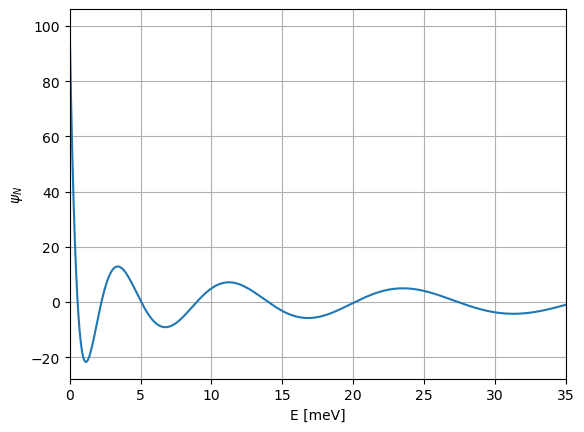

In [5]:
E *= to_meV
plt.plot(E, psi[..., -1])
plt.xlabel("E [meV]")
plt.ylabel(r"$\psi_{N}$")
plt.grid()
plt.xlim(E_min, E_max)
plt.show()

In [6]:
E_zero = E[560]  #na 35'000 punktow w okolo 560 jest pierwsze zero 
E_zero_plus = 1.05 * E_zero
E_zero_minus = 0.95 * E_zero

psi_plus  = np.zeros(N+1)
psi_minus = np.zeros(N+1)
psi_plus[1] = 1
psi_minus[1] = 1

for i in range(1, N):
    psi_plus[i+1] = Psi(psi_plus[i], psi_plus[i-1], E_zero_plus/to_meV, V_0)
    psi_minus[i+1] = Psi(psi_minus[i], psi_minus[i-1], E_zero_minus/to_meV, V_0) 
        
C1 = Integral(psi[560, :])
C2 = Integral(psi_minus)
C3 = Integral(psi_plus)     `

#psi = psi/C1
#psi_plus = psi_plus/C2
#psi_minus = psi_minus/C3

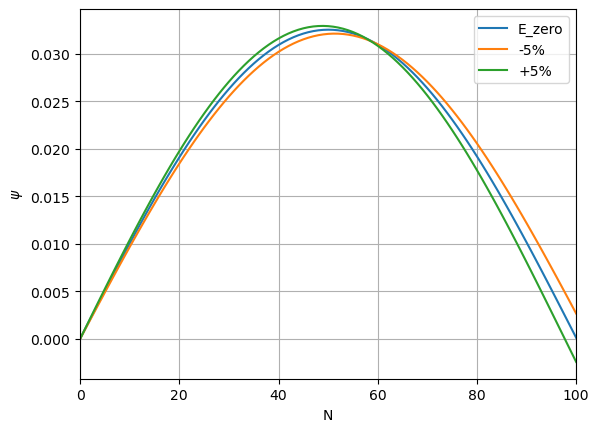

In [7]:
legend = ['E_zero', '-5%', '+5%']
plt.plot(psi[560, :]/C1)
plt.plot(psi_minus/C2)
plt.plot(psi_plus/C3)
plt.xlabel("N")
plt.ylabel(r"$\psi}$")
plt.xlim(0, N)
plt.legend(legend)
plt.grid()
plt.show()